### **What are the most demanded skills for the top 3 most popular data roles?**

##### **Methodology**
- *Clean-up skill column*
- *Calculate skill count based on job_title_short*
- *Calculate skill percentage*
- *Plot final findings*

##### **Import Libraries and Data**

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


# Clenup Data
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply (lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Hani\anaconda3\envs\python_project1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### **Filter Data for United States**

In [4]:
df_US = df[df['job_country']== 'United States']

##### **Explode Skills**
*Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.*

In [ ]:
df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


##### **Count Skills per Job Title**
*Groups DataFrame by job_skills and job_title_short, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, df_skills_count, shows the frequency of each skill with each job title.*

In [85]:
df_skills_count = df_skills.pivot_table( index= ['job_skills','job_title_short'], aggfunc= 'size').sort_values(ascending = False)

df_skills_count = df_skills_count.reset_index().rename(columns={0: 'skill_count'})
df_skills_count 

,job_skills,job_title_short,skill_count
0,python,Data Scientist,42379
1,sql,Data Analyst,34452
2,sql,Data Scientist,30034
3,excel,Data Analyst,27519
4,r,Data Scientist,26022
...,...,...,...
1865,vue.js,Business Analyst,1
1866,arch,Business Analyst,1
1867,asana,Machine Learning Engineer,1
1868,no-sql,Machine Learning Engineer,1


##### **Create List of Top 3 Roles**
**Focus:** Data Analysts, Data Engineers, and Data Scientists
*Filter the job titles based on the most popular.*

In [86]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

##### **Plot Skill Counts**

In [2]:

fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 5))
sns.set_style('darkgrid')

# Pilih palet warna (misalnya "tab10" untuk warna berbeda)
colors = sns.color_palette("Crest_r", n_colors= 5)  # Sesuaikan dengan jumlah skill

for i, job_title in enumerate (job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)

        # Pastikan jumlah warna sesuai jumlah skill dalam df_plot
    skill_colors = colors[:len(df_plot)]  

    df_plot.plot(
        kind='barh', 
        x='job_skills', 
        y='skill_count', 
        ax=ax[i], 
        title=job_title,
        color=skill_colors  # Terapkan warna
    )

    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 45000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=16, fontweight='bold', color='navy')
fig.tight_layout()
plt.show()


NameError: name 'plt' is not defined

##### **Convert Counts to Percentages**
**Focus:** Counts don't show what portions of jobs are requesting these skills

In [71]:
# Use original df to get the count of job titles
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [89]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


##### **Plot Percentage Count**

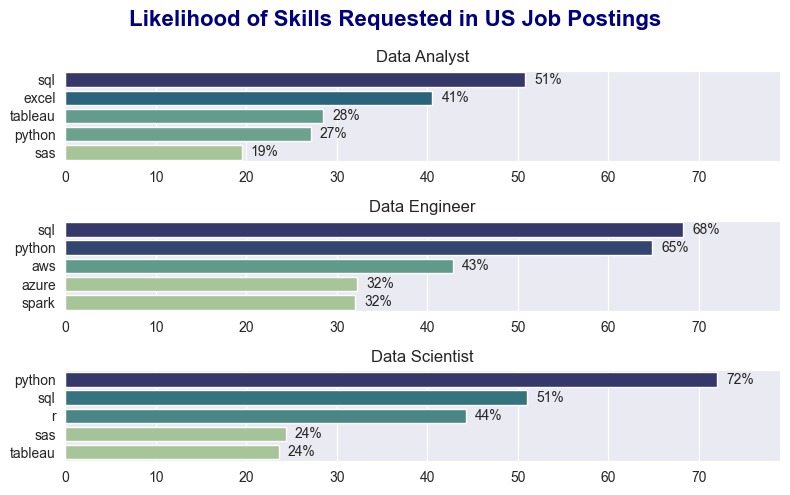

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8,5))
sns.set_style('darkgrid')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='Blues')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 79)

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=16, fontweight='bold', color='navy')
fig.tight_layout()
plt.show()